In [7]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path = [os.path.abspath('../')] + sys.path

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['OPENBLAS_NUM_THREADS'] = '1'

import matplotlib.pyplot as plt
from multiprocessing import cpu_count
from collections import OrderedDict

from experiments.tested_prox import (
    create_prox_l1_no_mu, create_prox_l1w_no_mu,
    create_prox_l1_no_mu_nuclear, create_prox_l1w_no_mu_nuclear,
    create_prox_nuclear
)
from experiments.sensitivity_to_regularization_constant import (
    get_metrics_for_strength_range, plot_metrics_for_strength_range,
    get_range_for_metric
)


directory_path = '/home/m.bompaire/experiments/hawkes_data/'

dim = 30
n_cpu = cpu_count() - 1
run_time = 10000
n_models = 100

n_decays = 3

strength_range = [1e-8, 1e-7]#, (1e-08, 0.01), (1e-05, 1e-08), (1e-05, 1e-05), (1e-05, 0.01), (0.01, 1e-08), (0.01, 1e-05), (0.01, 0.01)]
prox_infos = OrderedDict()

prox_infos['l1'] = {
    'n_initial_points': 10,
    'max_relative_step': 1.4,
    'create_prox': create_prox_l1_no_mu,
    'tol': 1e-1,
    'dim': 1,
}

prox_infos['l1w'] = {
    'n_initial_points': 10,
    'max_relative_step': 1.4,
    'create_prox': create_prox_l1w_no_mu,
    'tol': 1e-10,
    'dim': 1,
}

prox_infos = OrderedDict(
    (prox_name, dict(name=prox_name, **prox_info)) for prox_name, prox_info in prox_infos.items())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
prox_info = prox_infos['l1w']

In [11]:
import numpy as np
training_suffix = '100_x_25000_iter'
metrics = ['alpha_auc', 'estimation_error', 'kendall']
suffix = 'width_10'

In [12]:
strengths_to_learn = np.array([
    get_range_for_metric(dim, run_time, prox_info, metric, training_suffix=training_suffix)
    for metric in metrics
]).reshape(-1)

solver_kwargs = {'tol': 1e-10, 'max_iter': 25000}
get_metrics_for_strength_range(strength_ranges, dim, run_time, n_decays, n_models, prox_info,
                               solver_kwargs, directory_path, n_cpu=n_cpu, suffix=suffix)

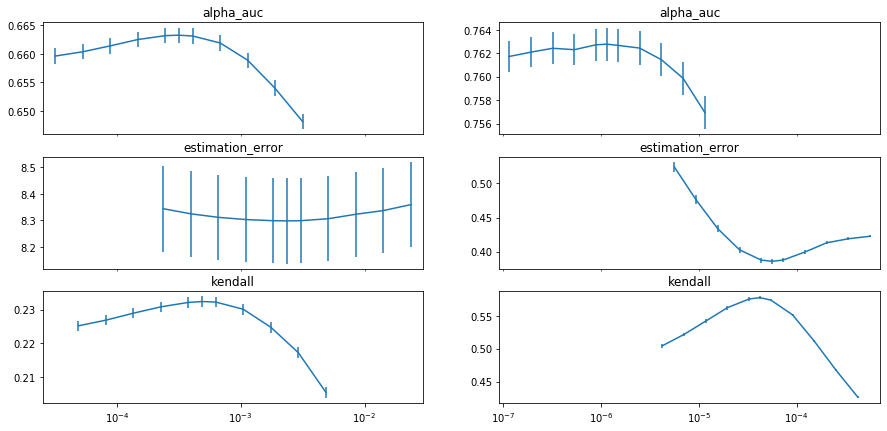

In [13]:
fig, axes = plt.subplots(3, 2, figsize=(15, 7))
from tick.plot.plot_utilities import share_x

for i, prox_name in enumerate(['l1', 'l1w']):
    for j, metric in enumerate(['alpha_auc', 'estimation_error', 'kendall']):
        prox_info = prox_infos[prox_name]
        ax = axes[j, i]
        strength_range = get_range_for_metric(dim, run_time, prox_info, metric, training_suffix=training_suffix)
        plot_metrics_for_strength_range(metric, prox_info, suffix=suffix, ax=ax, strength_range=strength_range)
        ax.set_title(metric)
    share_x(axes[:, i].reshape(-1, 1))